# Exploracão - EDA

- Carregar o dataset de treino com pandas
- Visualizar o dataset
- Plotar histogramas
- Heatmap de correlação

In [1]:
# Imports
import pandas as pd

In [4]:
# Load data
df = pd.read_csv('./../data/raw/train.csv')

In [7]:
# Entendendo o dataset
print("Shape:", df.shape)
display(df.head())

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Info e estatísticas

print(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [9]:
# Faltantes

missing = (df.isnull().mean() * 100).round(2)
display(missing[missing > 0])

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

## Gráficos de Distribuição

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


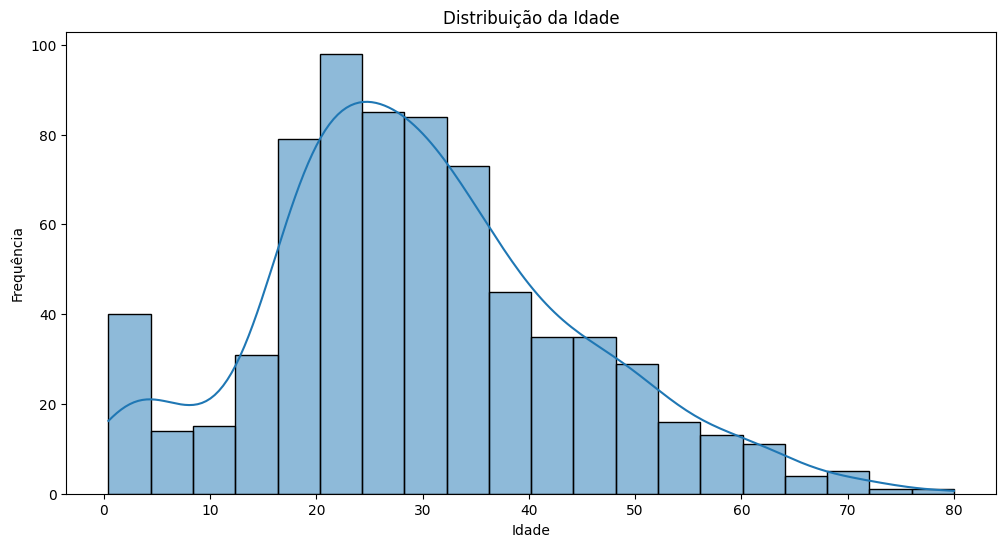

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribuição da Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

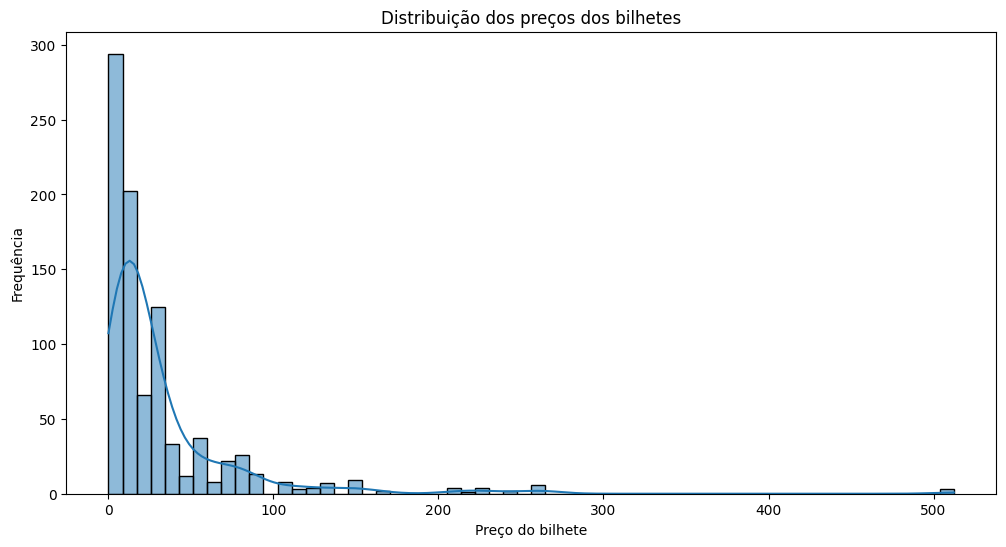

In [15]:


plt.figure(figsize=(12, 6))
sns.histplot(df["Fare"], bins=60, kde=True)
plt.title("Distribuição dos preços dos bilhetes")
plt.xlabel("Preço do bilhete")
plt.ylabel("Frequência")
plt.show()

### Contagens Categóricas

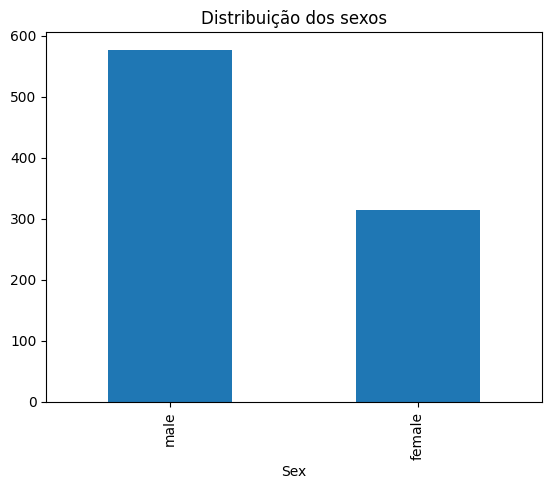

In [16]:
df["Sex"].value_counts().plot(kind="bar", title="Distribuição dos sexos")
plt.show()

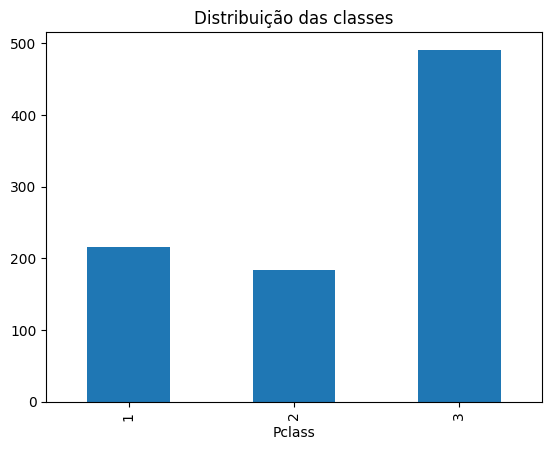

In [18]:
df["Pclass"].value_counts().sort_index().plot(kind="bar", title="Distribuição das classes")
plt.show()

### Matriz de Correlação

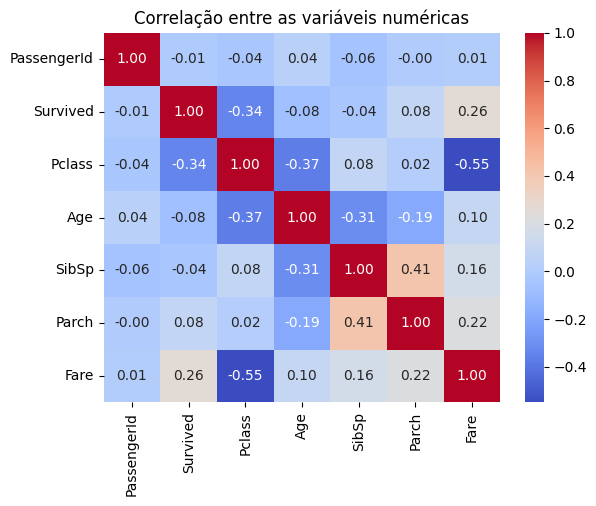

In [19]:
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre as variáveis numéricas")
plt.show()

## Feature Engineering

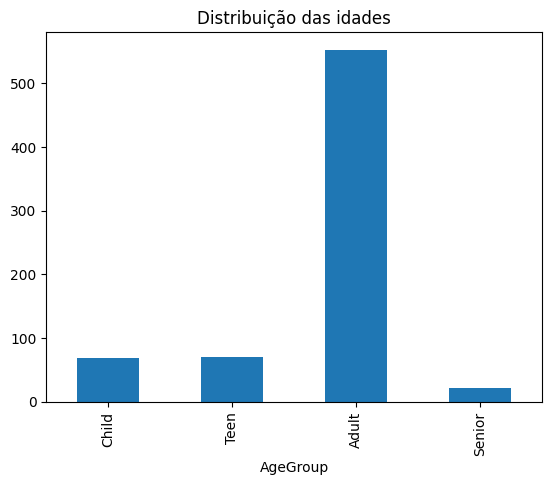

In [21]:
bins = [0, 12, 18, 60, 80]
labels = ["Child", "Teen", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)
df["AgeGroup"].value_counts().sort_index().plot(kind="bar", title="Distribuição das idades")
plt.show()

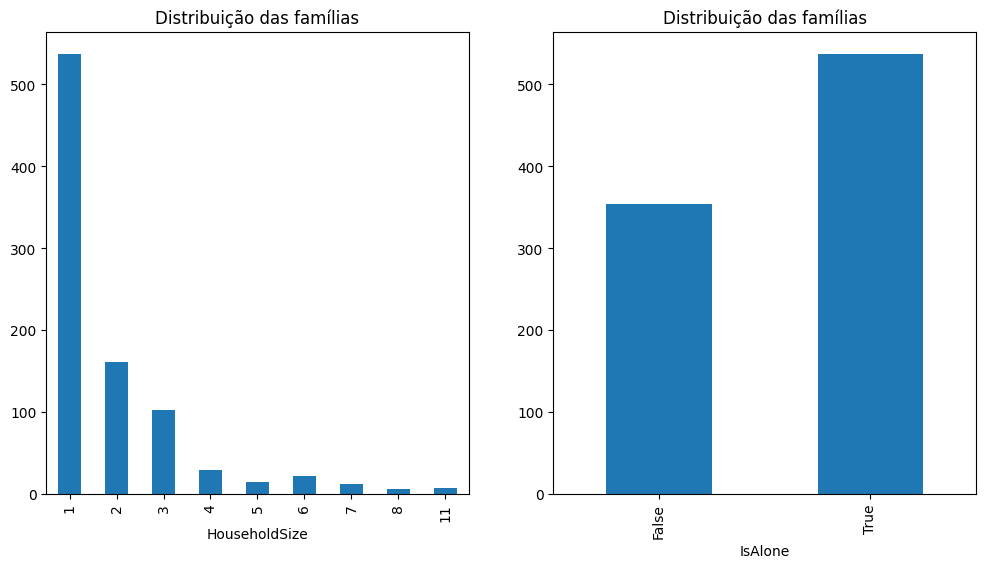

In [30]:
df["HouseholdSize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = df["HouseholdSize"] == 1

# Se em familia quantos, se não sozinho
df_familias = df[df["HouseholdSize"] > 0]
_, axs = plt.subplots(1, 2, figsize=(12, 6))

df_familias["HouseholdSize"].value_counts().sort_index().plot(kind="bar", ax=axs[0], title="Distribuição das famílias")
df_familias["IsAlone"].value_counts().sort_index().plot(kind="bar", ax=axs[1], title="Distribuição das famílias")
plt.show()



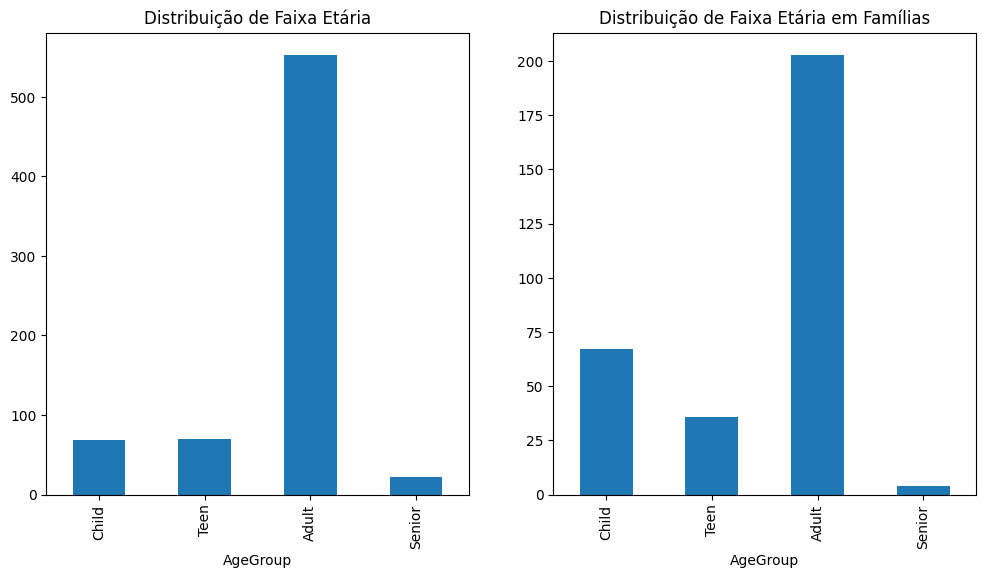

In [27]:
# Alone_x_AgeGroup one-hot encoding
# Criação de gráficos de barras paralelas para comparar a quantidade de pessoas em cada faixa etária e quantas estão em famílias
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para a distribuição de faixa etária
df["AgeGroup"].value_counts().sort_index().plot(kind="bar", ax=axs[0])
axs[0].set_title("Distribuição de Faixa Etária")

# Gráfico de barras para a distribuição de faixa etária em famílias
df[df["HouseholdSize"] > 1]["AgeGroup"].value_counts().sort_index().plot(kind="bar", ax=axs[1])
axs[1].set_title("Distribuição de Faixa Etária em Famílias")

plt.show()

<Axes: title={'center': 'Taxa de Sobrevivência: IsAlone'}, xlabel='IsAlone'>

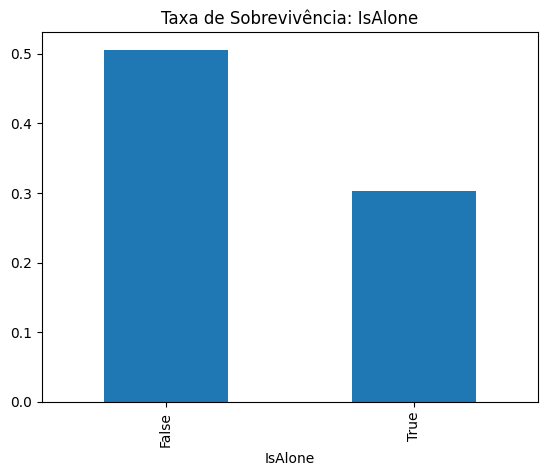

In [28]:

# REVER ESSE calc
df.groupby("IsAlone")["Survived"].mean().plot.bar(
    title="Taxa de Sobrevivência: IsAlone"
)

/var/folders/6q/f7pcgt7d69q3ygmsmfgh6tfc0000gn/T/ipykernel_98303/709169860.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_pivot = df.pivot_table(


<Axes: title={'center': 'Sobrevivência por Idade e IsAlone'}, xlabel='AgeGroup'>

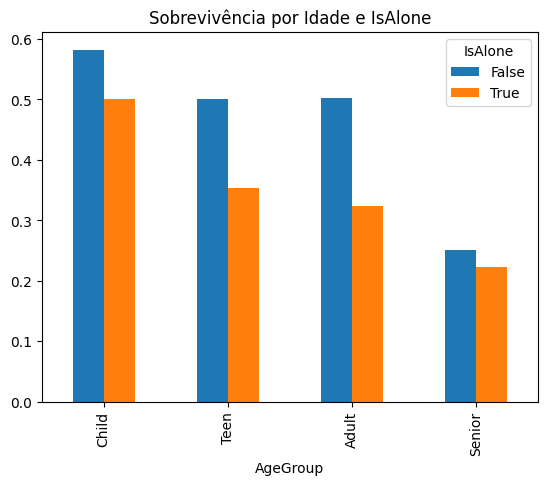

In [29]:
survival_pivot = df.pivot_table(
    index="AgeGroup", columns="IsAlone", values="Survived", aggfunc="mean"
)
survival_pivot.plot(kind="bar", title="Sobrevivência por Idade e IsAlone")